In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Importing Required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('/content/drive/MyDrive/fraud_detection_dataset/Fraud.csv')

# basic dataset overview

In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [33]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [34]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Class Distribution: Fraud vs Non-Fraud
observation: I noticed that only around **0.13%** of the transactions are marked as fraud, and the rest (almost **99.87%**) are normal.

In [35]:
fraud_counts = df['isFraud'].value_counts()
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
print("Fraud class counts:\n", fraud_counts)
print("\nFraud class percentage:\n", fraud_percentage)

Fraud class counts:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud class percentage:
 isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


 # Visualizing Fraud vs Non-Fraud Transactions
 observation: Encountered highly imbalanced data

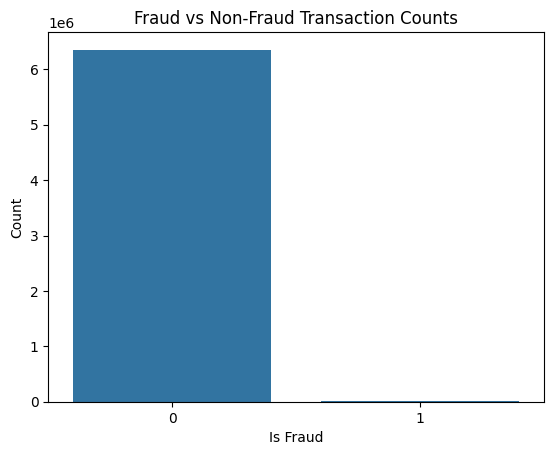

In [36]:
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Counts')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

##  Distribution of Transaction Types

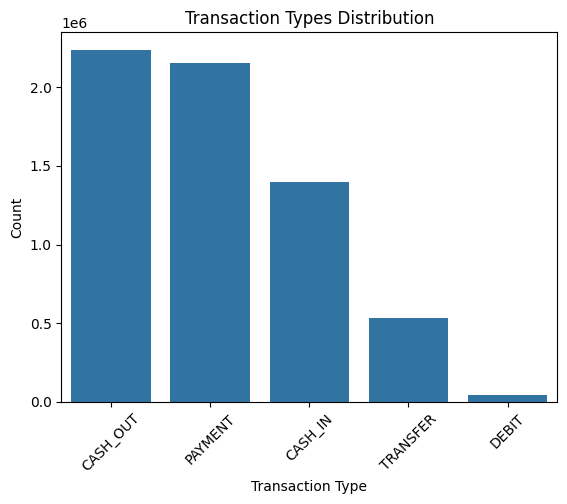

In [37]:
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Transaction Types Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Fraud by Transaction Type

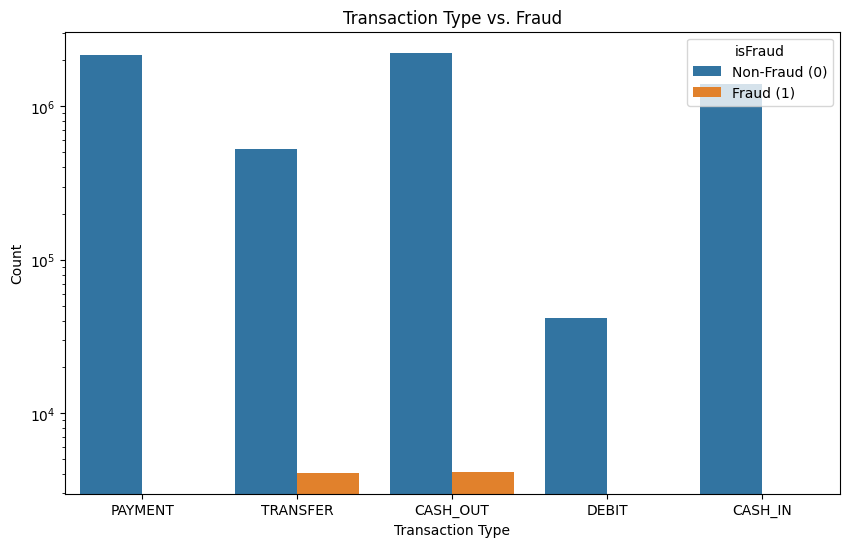

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs. Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.yscale('log')
plt.legend(title='isFraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()


#  Correlation Between Numerical Features
observation: Some features like `oldbalanceOrg` and `newbalanceOrig` have a **perfect correlation (1.0)**  which means they carry almost the same info.  
Same goes for `oldbalanceDest` and `newbalanceDest` (very close to 1.0).

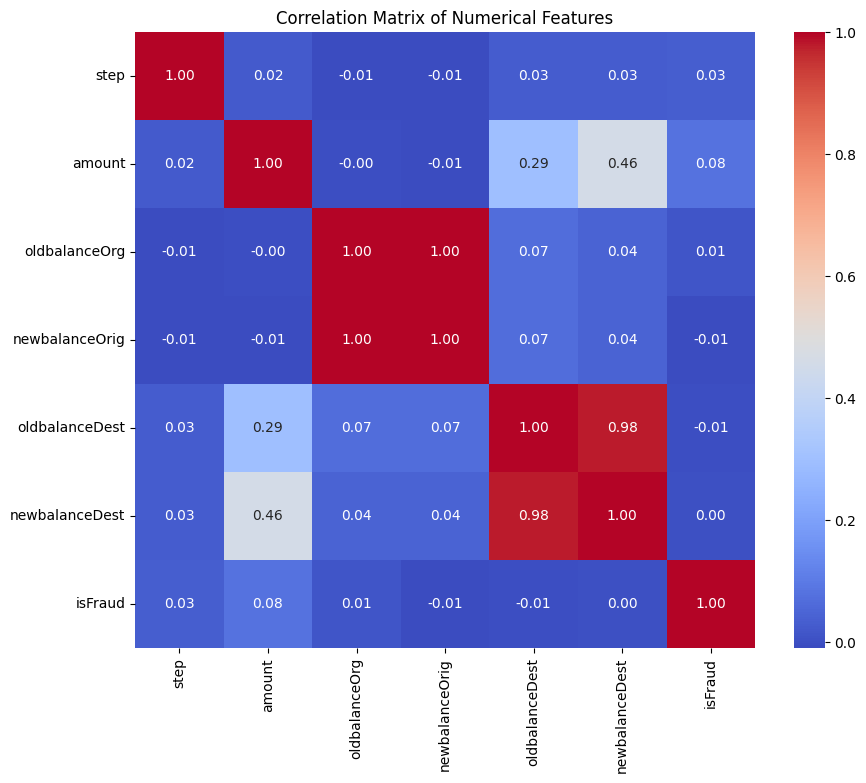

In [39]:
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##  Boxplot of Transaction Amounts

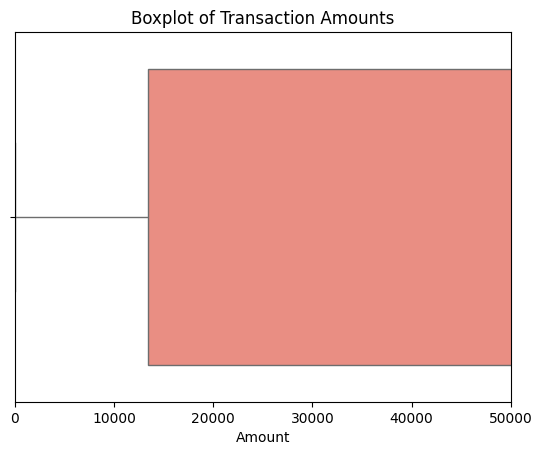

In [40]:
sns.boxplot(x=df['amount'], color='salmon')
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.xlim(0, 50000)
plt.show()


# Detecting Outliers Using Z-Score

In [41]:
from scipy.stats import zscore
df['z_amount'] = zscore(df['amount'])
outliers = df[np.abs(df['z_amount']) > 3]
print(f" Number of outliers in 'amount' (|z| > 3): {outliers.shape[0]}")
outliers[['amount', 'isFraud']].head()


 Number of outliers in 'amount' (|z| > 3): 44945


,amount,isFraud
359,2421578.09,0
375,2545478.01,0
376,2061082.82,0
1153,3776389.09,0
1202,2258388.15,0


In [42]:
df_cleaned = df.drop(['nameOrig', 'nameDest', 'newbalanceOrig', 'newbalanceDest'], axis=1)

In [43]:
if 'type' in df_cleaned.columns:
    df_cleaned = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)

In [44]:
print(" Cleaned dataset shape:", df_cleaned.shape)
df_cleaned.head()

 Cleaned dataset shape: (6362620, 11)


,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,z_amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,-0.281560,False,False,True,False
1,1,1864.28,21249.0,0.0,0,0,-0.294767,False,False,True,False
2,1,181.00,181.0,0.0,1,0,-0.297555,False,False,False,True
3,1,181.00,181.0,21182.0,1,0,-0.297555,True,False,False,False
4,1,11668.14,41554.0,0.0,0,0,-0.278532,False,False,True,False


##  Training the Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
print(" Random Forest model trained successfully.")


 Random Forest model trained successfully.


model evaluation

# Model Evaluation
- **Precision for Fraud (class 1):** `94.57%`
- **Recall for Fraud (class 1):** `72.12%`
- **F1-Score for Fraud:** `81.84%`
- **ROC-AUC Score:** `0.9896`

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\n ROC-AUC Score:", roc_auc_score(y_test, y_proba))

 Confusion Matrix:
 [[1270813      68]
 [    458    1185]]

 Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998   1270881
           1     0.9457    0.7212    0.8184      1643

    accuracy                         0.9996   1272524
   macro avg     0.9727    0.8606    0.9091   1272524
weighted avg     0.9996    0.9996    0.9996   1272524


 ROC-AUC Score: 0.9896149688518895


# Feature Importance

/tmp/ipython-input-47-2970115677.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')


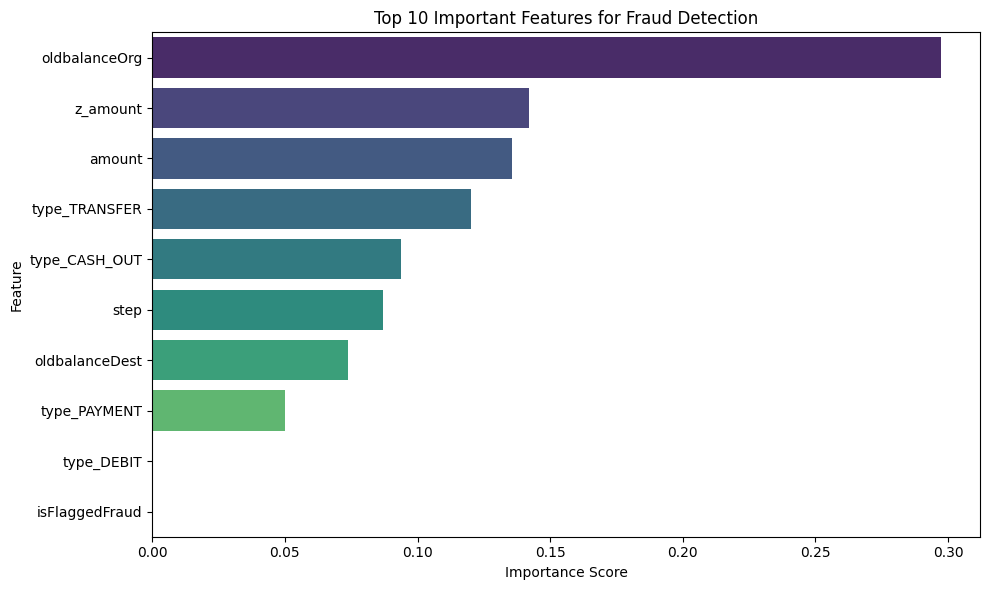

,Feature,Importance
2,oldbalanceOrg,0.297178
5,z_amount,0.142128
1,amount,0.135545
9,type_TRANSFER,0.120065
6,type_CASH_OUT,0.093865
0,step,0.087106
3,oldbalanceDest,0.073691
8,type_PAYMENT,0.049963
7,type_DEBIT,0.000433
4,isFlaggedFraud,0.000026


In [47]:
importances = rf_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')
plt.title('Top 10 Important Features for Fraud Detection')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
feature_df.head(10)
